## MULTIPLE LINEAR REGRESSION

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Taskes:


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.


#EDA

In [1]:
import pandas as pd

# Load data
data = pd.read_csv(r"/content/ToyotaCorolla - MLR.csv")
data




,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
data.shape

(1436, 11)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
data.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [9]:
#handling missing values
data.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


#Visualization

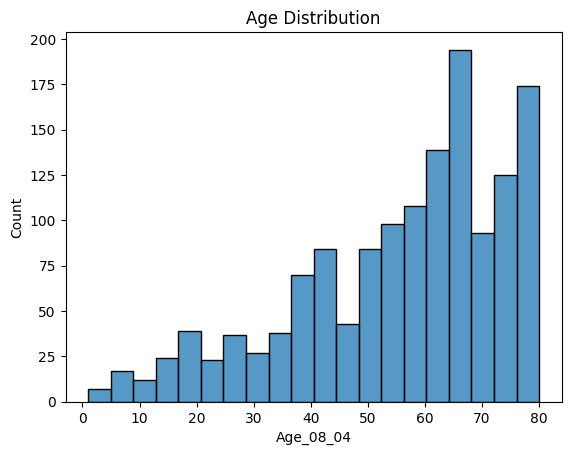

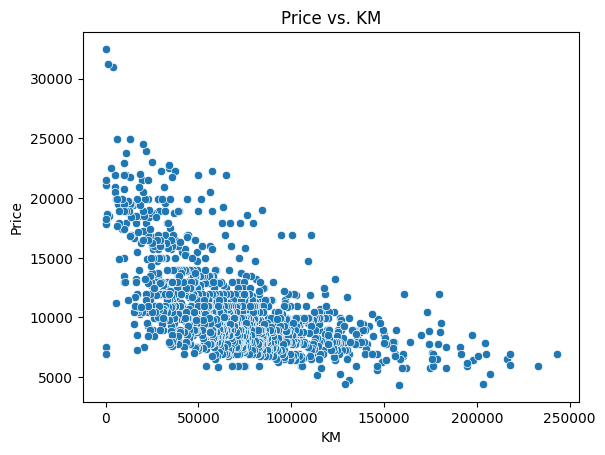

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram for Age
sns.histplot(data['Age_08_04'], bins=20)
plt.title('Age Distribution')
plt.show()
# Scatter plot
sns.scatterplot(x='KM', y='Price', data=data)
plt.title('Price vs. KM')
plt.show()


#Data Preprocessing

In [12]:
#handling categorical
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)
data['Automatic'] = data['Automatic'].apply(lambda x: 1 if x == 'yes' else 0)


In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1148, 11) (1148,)
Testing set shape: (288, 11) (288,)


#BUILT A MLR MODEL

In [15]:
from sklearn.linear_model import LinearRegression

# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coefficients interpretation
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
Age_08_04        -1.204596e+02
KM               -1.628370e-02
HP                1.345912e+01
Automatic        -4.618528e-13
cc               -2.168559e-02
Doors            -6.499651e+01
Cylinders         4.547474e-13
Gears             5.312611e+02
Weight            2.621390e+01
Fuel_Type_Diesel -1.159684e+02
Fuel_Type_Petrol  1.379235e+03


#EVALUATE THE MODEL

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model1.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2: 0.833729931263407
MAE: 991.5541216778417
MSE: 2218506.4181801397


#APPLY LASSO,RIDGE REGRESSION

In [ ]:
#IMPORT LIBRARY
from sklearn.linear_model import Lasso, Ridge

In [19]:
# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [20]:
# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


Ridge(alpha=0.1)

In [21]:

# Model evaluation
print("Lasso R^2:", r2_score(y_test, lasso.predict(X_test)))
print("Ridge R^2:", r2_score(y_test, ridge.predict(X_test)))


Lasso R^2: 0.8337999542913808
Ridge R^2: 0.8337575988328199


## INTERVIEW QUESTIONS

 1. Normalization & Standardization:
Ans.
* The data is scaled to a range (0 to 1) using normalization.  useful when different units are used for features.  aids in feature-scale-sensitive algorithms.
*  The data is centered by standardization (mean = 0 and variance = 1).  beneficial for algorithms that make the assumption that the distribution of data is normal.
2. Techniques to Address Multicollinearity:
Ans.
* Eliminate strongly linked variables. 
* Reduce dimensionality using Principal Component Analysis (PCA).  
* Use regularization strategies that reduce multicollinearity, such as Lasso and Ridge regression.

